# Experimento de Young con luz policromática

## Consideraciones iniciales

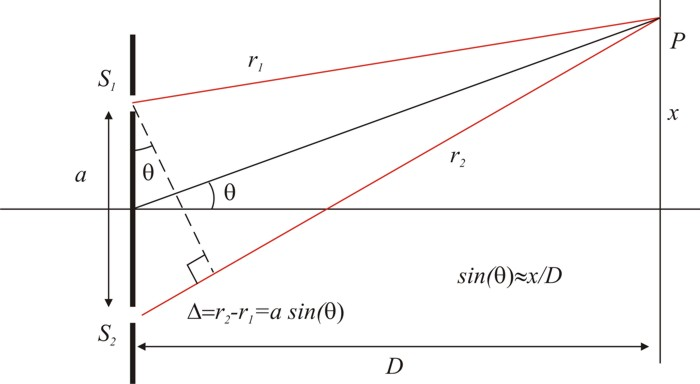

In [1]:
from IPython.display import Image
Image(filename="ExperimentoYoung.jpg")

Cuando estudiamos el experimento de Young, asumimos que iluminábamos con radiación monocromática. En este caso, la posición de los máximos y mínimos de irradiancia venían dados por, 

<div class="alert alert-error">
Máximos de irradiancia.  $\delta = 2 m \pi \implies \frac{a x}{D} = m \lambda \implies$

$$x_{max} = \frac{m \lambda D}{a}$$
</div>
<div class="alert alert-error">
Mínimos de irradiancia.  $\delta = (2 m + 1)\pi \implies \frac{a x}{D} = (m +1/2) \lambda \implies$

$$x_{min} = \frac{(m + 1/2) \lambda D}{a}$$
</div>

Como vemos en las fórmulas anteriores, la posición de los máximos y mínimos dependen de la longitud de onda $\lambda$. Cuando iluminamos el mismo experimento con radiación no monocromática, podemos considerar que cada longitud de onda que compone el espectro de la radiación forma su patrón de interferencias. Pero cada patrón de interferencias tendrá los máximos en posiciones ligeramente distintas. Esto va a llevar a una reducción del constraste y finalmente, a la desaparición de las franjas de interferencia. Vamos a estudiar este proceso con más detalle, viendo primero una mejor aproximación que una onda monocromática a la radiación que emiten la fuentes de luz reales, y posteriormente, cómo afecta este tipo de radiación a las interferencias en un experimento de Young

## Trenes de onda

Aunque la abstracción de tratar una onda monocromática es extremadamente útil, las fuentes de luz reales no emiten tal radiación. La razón es sencilla: una onda monocromática pura (es decir, un seno o un coseno) no tiene ni principio ni final, por lo que para emitir una onda de este tipo se necesitaría energía infinita.

Lo más próximo que podemos obtener a una onda monocromática es una sucesión de trenes de ondas armónicos separados unos de otros por saltos aleatorios en la fase de la onda. 

El siguiente código muestra un ejemplo de este tipo de trenes de onda.

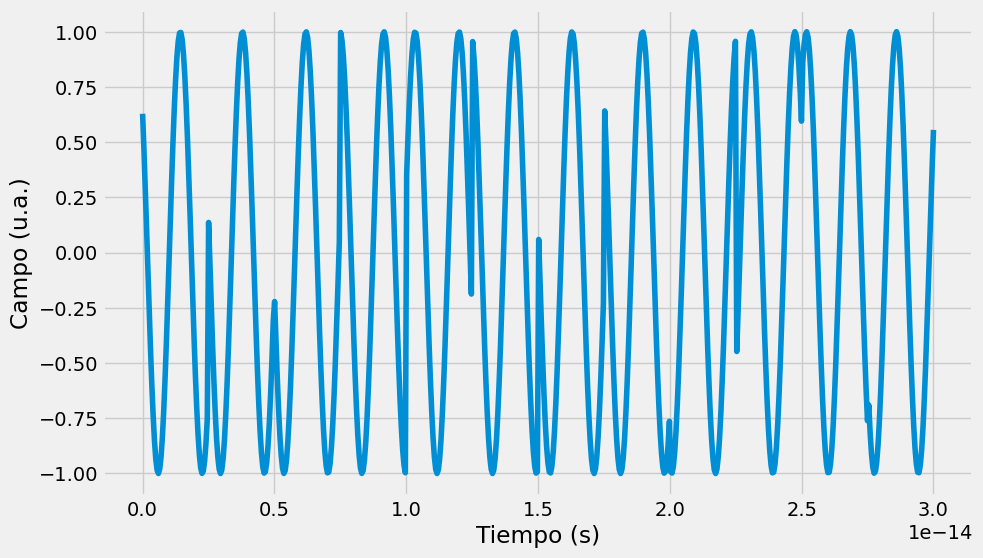

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
#import ipywidgets as widg
#from IPython.display import display

#####
#PARÁMETROS QUE SE PUEDEN MODIFICAR
#####
Lambda = 5e-7
c0 = 3e8
omega = 2*np.pi*c0/Lambda
T = 2*np.pi/omega
tau = 1.5*T
###########

time = np.linspace(0,18*T,600)

def campo(t,w,tau0):
    numsaltos = (int)(np.floor(t[-1]/tau0))
    phi = (np.random.random(numsaltos)-0.5)*4*np.pi
    phi_aux = np.array([np.ones((int)(np.floor(np.size(t)/numsaltos)))*phi[i] for i in range(numsaltos)])
    phi_t = np.reshape(phi_aux,np.shape(phi_aux)[0]*np.shape(phi_aux)[1])
    phi_t = np.pad(phi_t,(np.size(t)-np.size(phi_t),0),mode='edge')
    e1 = np.cos(omega*t + phi_t)
    fig,ax = plt.subplots(1,1,figsize=(10,6))
    ax.plot(t,e1)
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Campo (u.a.)')
    return None

campo(time,omega,tau)

## Longitud de coherencia

El tiempo en el que la fase de la onda permanece constante (tiempo entre saltos consecutivos) se llama **tiempo de coherencia** y nosotros lo denominaremos $t_c$. 

Si observamos el tren de ondas espacialmente, veremos una figura similar a la anterior, es decir, una figura sinusoidal con un periodo igual a la longitud de onda $\lambda$ y con saltos de fase cada cierta distancia. A esta distancia se le denomina **longitud de coherencia** ($l_c$) y se relaciona con el tiempo de coherencia mediante la relación, 

$$l_c = c t_c$$

donde $c$ es la velocidad de la luz.

## Anchura espectral

Un tren de ondas deja de ser una radiación completamente monocromática, es decir, con una única longitud de onda o frecuencia, pasando a tener una cierta anchura espectral. Lo podemos entender observando que un tren de ondas deja de ser un coseno o un seno debido a esos saltos de fase aleatorios, pasando a tener una evolución temporal más compleja. 

La anchura en frecuencias (o longitudes de onda) de un tren de ondas la podemos hallar mediante la transformada de Fourier. Este análisis queda fuera del objeto de este curso pero sí nos vas a resultar útil un resultado que emerge de esta transformada: la relación entre anchura espectral (rango de frecuencias presentes en la radiación $\Delta \nu$) y tiempo de coherencia. Esta relación es, 

$$t_c \simeq \frac{1}{\Delta \nu}$$


Teniendo en cuenta que $\nu = c/\lambda$ podemos llegar a la relación entre la longitud de coherencia y la anchura espectral expresada en longitudes de onda, 
<div class="alert alert-success">
$$l_c \simeq \frac{\lambda^2}{\Delta \lambda}$$
</div>
La anterior relación nos dice que a mayor longitud de coherencia, menor anchura espectral de la radiación, o lo que es lo mismo, más monocromática será o más coherente.

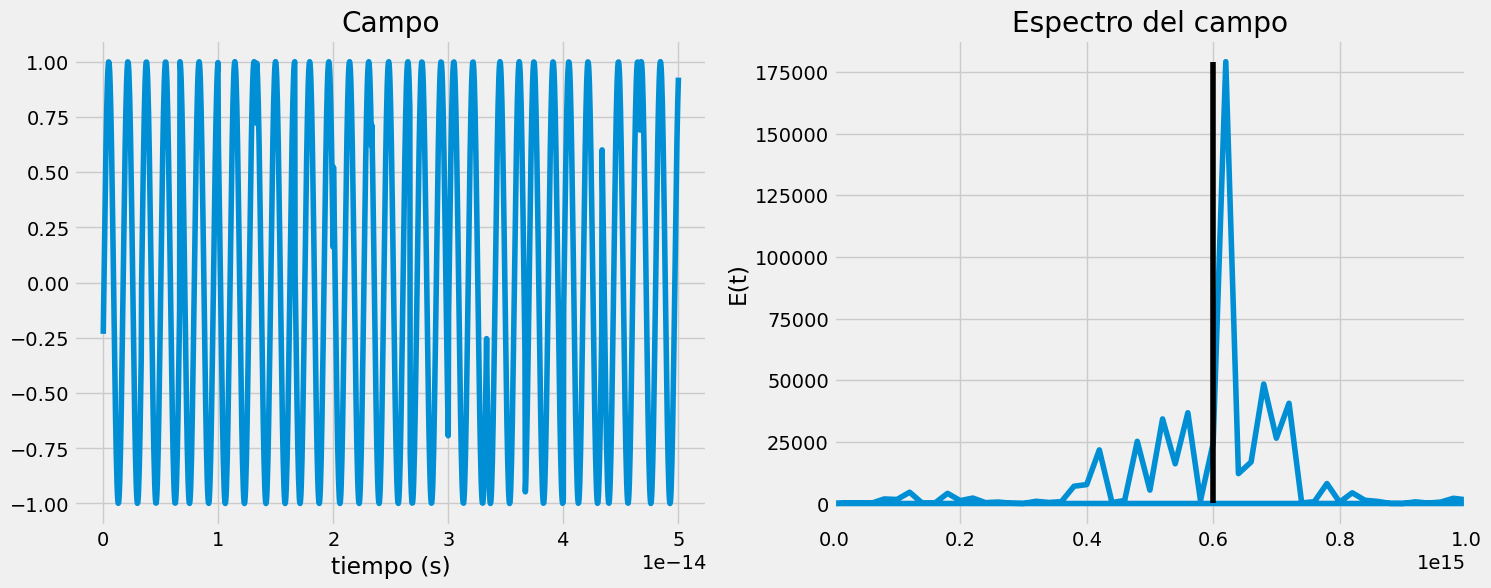

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
import ipywidgets as widg
from IPython.display import display

#####
#PARÁMETROS QUE SE PUEDEN MODIFICAR
#####
Lambda = 5e-7
c0 = 3e8
omega = 2*np.pi*c0/Lambda
T = 2*np.pi/omega
time = np.linspace(0,30*T,1500)
tau = 2*T
###########
def campofft(t,w,tau0):
    numsaltos = (int)(np.floor(t[-1]/tau0))
    phi = (np.random.random(numsaltos)-0.5)*4*np.pi
    phi_aux = np.array([np.ones((int)(np.floor(np.size(t)/numsaltos)))*phi[i] for i in range(numsaltos)])
    phi_t = np.reshape(phi_aux,np.shape(phi_aux)[0]*np.shape(phi_aux)[1])
    phi_t = np.pad(phi_t,(np.size(t)-np.size(phi_t),0),mode='edge')
    e1 = np.cos(omega*t + phi_t)
    fig1,ax1 = plt.subplots(1,2,figsize=(16,6))
    ax1[0].plot(t,e1)
    ax1[0].set_title('Campo')
    ax1[0].set_xlabel('tiempo (s)')
    ax1[1].set_ylabel('E(t)')
    freq = np.fft.fftfreq(t.shape[0],t[1]-t[0])
    e1fft = np.fft.fft(e1)
    ax1[1].plot(freq,np.abs(e1fft)**2)
    ax1[1].set_xlim(0,0.1e16)
    ax1[1].set_title('Espectro del campo')
    ax1[1].vlines(omega/(2*np.pi),0,np.max(np.abs(e1fft)**2),'k')
    return 

campofft(time,omega,tau)

## ¿Qué ocurre si iluminamos el experimento de Young con este tipo de radiación?

Si iluminamos una doble rendija con un tren de ondas como el representado anteriormente, tendremos dos ondas llegando a un cierto punto de la pantalla con la misma evolución temporal pero una de ellas retrasada con respecto a la otra. Esto es debido a la diferencia de camino óptico recorrido por cada tren de onda. 

Cuando superponemos ambos trenes (uno con un cierto retraso con respecto al otro), la diferencia entre las fases iniciales de cada onda dependerá del tiempo. Además, como los saltos de fase en el tren de ondas son aleatorios, esa diferencia de fase cambiara a su vez aleatoriamente.

Esta diferencia aleatoria tiene un gran efecto en la irradiancia total del patron de interferencias.

Recordemos que la intensidad total viene dada por:

$$ I_t  = I_1 + I_2 + \epsilon_0 c n < E_1 E_2>_{\tau}$$

En la anterior expresion hemos dejado explícitamente en el término interferencial el promedio sobre el producto escalar de los campos que interfieren. Este producto escalar nos da lugar a, 

$$\int_0^\tau \cos(k_1 r - \omega t + \phi_1) \cos(k_2 r - \omega t + \phi_2) dt$$

que podemos escribir en función de la diferencia de fases iniciales  $\phi_1 - \phi_2$. Si esta diferencia varía aleatoriamente durante el intervalo de tiempo $\tau$, su promedio sera nulo y el termino interferencial tambien lo sera. Por tanto la irradiancia total sera, 


$$I_t = I_1 + I_2$$

Es decir, se pierden las franjas de interferencia. Esta situación ocurrirá cuando la diferencia de camino sea suficiente como para que no se solapen las zonas de los trenes de ondas que interfieren con la misma fase. Desde el centro de la pantalla (diferencia de fase igual a cero entre las ondas que interfieren) veremos entonces cómo las franjas se van perdiendo gradualmente a medida que nos alejamos a puntos exteriores (el contraste disminuye progresivamente) hasta que se pierden por completo (contraste igual a cero). En este punto, la irradiancia total será simplemente la suma de las irradiancias de los haces que interfieren.

El punto en el que las franjas se pierden por completo será, como se ha comentado, aquel que haga que no haya solapamiento entre las zonas de los trenes de ondas con la misma fase. Es decir, la diferencia de camino ha de ser mayor que la distancia característica de cada una de estas zonas. Esta distancia es simplemente la longitud de coherencia. Por tanto, perderemos la interferencia si, 

<div class="alert alert-success">
$$\Delta > l_c$$
</div>
donde $\Delta$ denota la diferencia de camino entre los haces.

El siguiente código muestra el patrón de interferencias cuando iluminamos el experimento de Young con un tren de ondas.

interfranja 0.5833333333333333 (mm)
longitud de coherencia 2.5 (um)


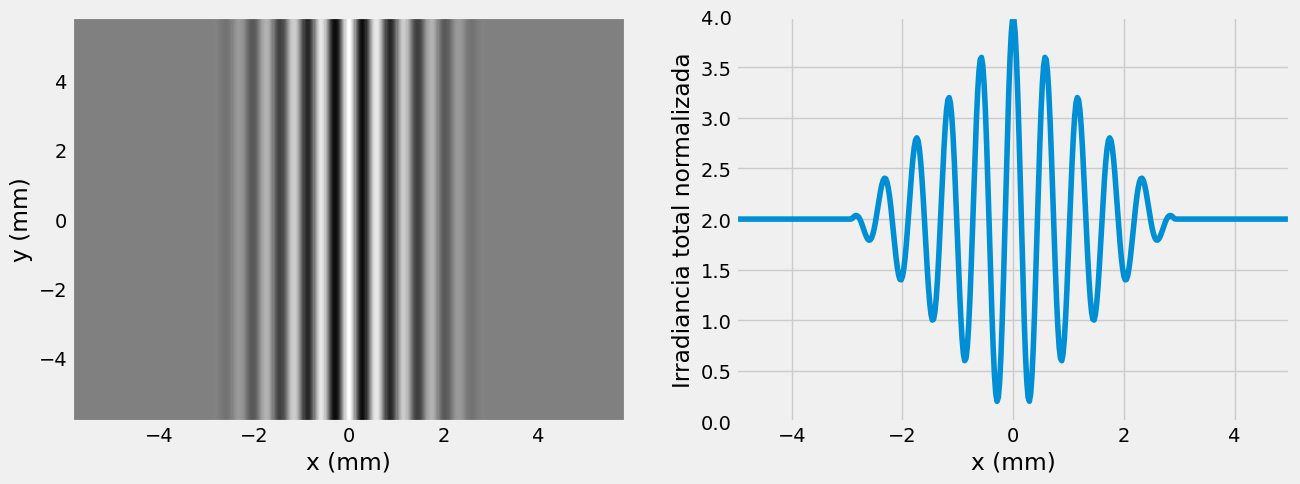

In [4]:
from matplotlib.pyplot import *
from numpy import *
%matplotlib inline
style.use('fivethirtyeight')

#####
#PARÁMETROS QUE SE PUEDEN MODIFICAR
#####
Lambda = 5e-7 # longitud de onda de la radiación de 500 nm
k = 2.0*pi/Lambda
D = 3.5# en metros
a = 0.003 # separación entre fuentes de 3 mm
DeltaLambda = 10e-8 # anchura espectral
###########

lc = (Lambda**2)/DeltaLambda
interfranja = Lambda*D/a
print ("interfranja",interfranja*1e3, "(mm)") # muestra el valor de la interfranja en mm
print( "longitud de coherencia", lc*1e6, "(um)") #muestra el valor de la long. de coherencia en um

x = linspace(-10*interfranja,10*interfranja,500)
I1 = 1 # Consideramos irradiancias normalizadas a un cierto valor.
I2 = 1

X,Y = meshgrid(x,x)
Delta = a*X/D
delta = k*Delta

gamma12 = (1 - np.abs(Delta)/lc)*(np.abs(Delta)<lc)
Itotal = I1 + I2 + 2.0*sqrt(I1*I2)*gamma12*cos(delta)

figure(figsize=(14,5))
subplot(121)
pcolormesh(x*1e3,x*1e3,Itotal,cmap = 'gray',vmin=0,vmax=4,shading='auto')
xlabel("x (mm)")
ylabel("y (mm)")
subplot(122)
plot(x*1e3,Itotal[(int)(x.shape[0]/2),:])
xlim(-5,5)
ylim(0,4)
xlabel("x (mm)")
ylabel("Irradiancia total normalizada");